In [28]:
from pymongo import MongoClient
from pprint import pprint
from pymongo.errors import *
import json

In [29]:
client = MongoClient(host='localhost', port=27017)
db = client['bookshop']
books = db.books

In [30]:
with open('./all_book.json', 'r', encoding='UTF-8-sig') as f:
    data = json.load(f, )

In [32]:
data

[{'name': "It's Only the Himalayas",
  'price': 45.17,
  'rating': 'Two',
  'quantity': 19,
  'description': 'â\x80\x9cWherever you go, whatever you do, just . . . donâ\x80\x99t do anything stupid.â\x80\x9d â\x80\x94My MotherDuring her yearlong adventure backpacking from South Africa...',
  'category': 'Travel',
  'UPC': 'a22124811bfa8350'},
 {'name': 'Full Moon over Noahâ\x80\x99s Ark: An Odyssey to Mount Ararat and Beyond',
  'price': 49.43,
  'rating': 'Four',
  'quantity': 15,
  'description': 'Acclaimed travel writer Rick Antonson sets his adventurous compass on Mount Ararat, exploring the regionâ\x80\x99s long history, religious mysteries, and co...',
  'category': 'Travel',
  'UPC': 'ce60436f52c5ee68'},
 {'name': 'See America: A Celebration of Our National Parks & Treasured Sites',
  'price': 48.87,
  'rating': 'Three',
  'quantity': 14,
  'description': 'To coincide with the 2016 centennial anniversary of the National Parks Service, the Creative Action Network has partnered wit

In [33]:
count_duplicates = 0

for doc in data:
    try:
        books.insert_one(doc)
    except:
        count_duplicates += 1
        print(doc)
print(count_duplicates) 

0


Данные успешно добавлены 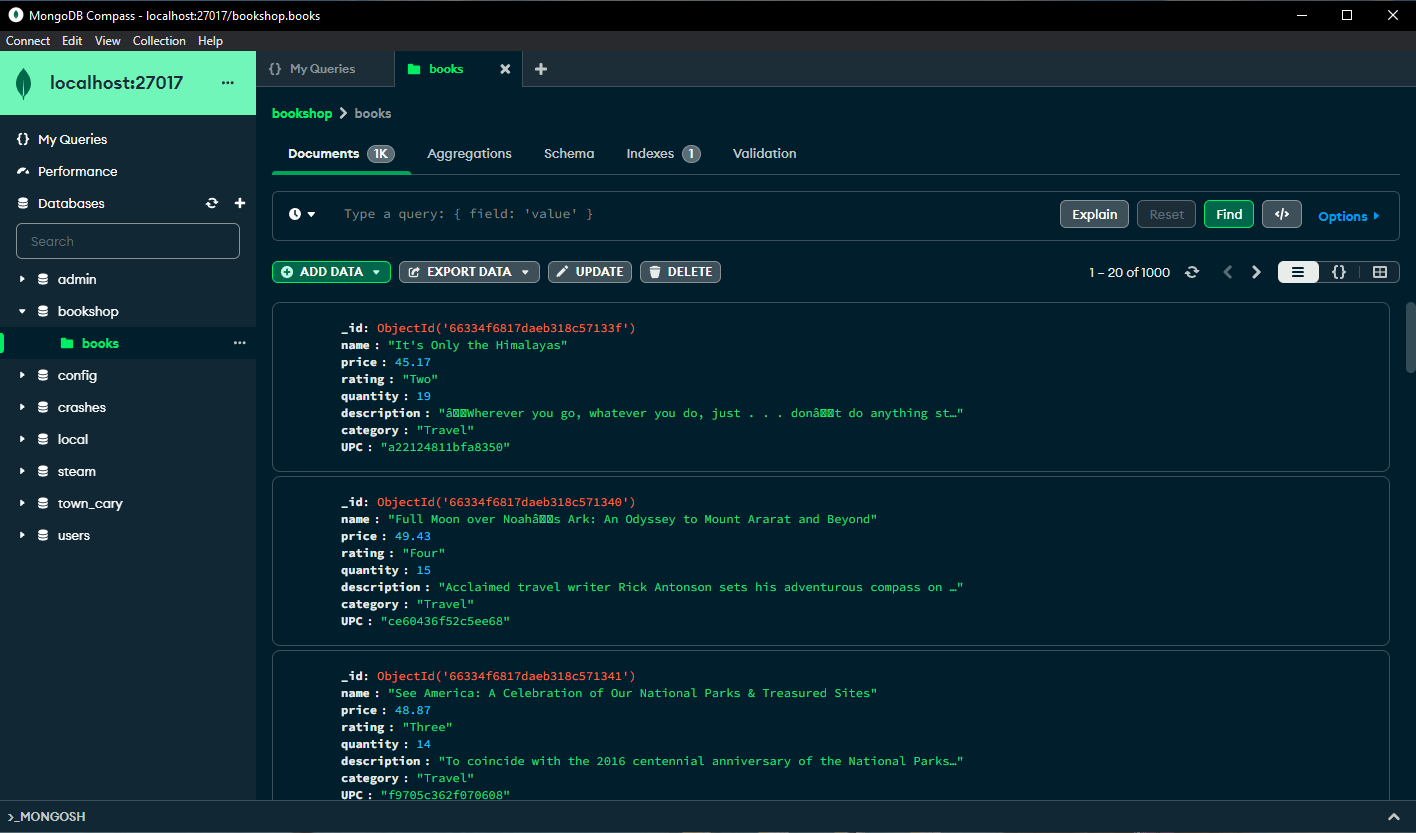

## Поэкспериментируем с запросами
1. Найдем все книги с рейтингом 4 и выше

In [34]:
for doc in books.find({'rating': {"$in": ['Four', 'Five']}}):
    print(doc)

{'_id': ObjectId('66334ff517daeb318c571729'), 'name': 'Full Moon over Noahâ\x80\x99s Ark: An Odyssey to Mount Ararat and Beyond', 'price': 49.43, 'rating': 'Four', 'quantity': 15, 'description': 'Acclaimed travel writer Rick Antonson sets his adventurous compass on Mount Ararat, exploring the regionâ\x80\x99s long history, religious mysteries, and co...', 'category': 'Travel', 'UPC': 'ce60436f52c5ee68'}
{'_id': ObjectId('66334ff517daeb318c57172f'), 'name': 'A Year in Provence (Provence #1)', 'price': 56.88, 'rating': 'Four', 'quantity': 6, 'description': 'National BestsellerIn this witty and warm-hearted account, Peter Mayle tells what it is like to realize a long-cherished dream and actually move into ...', 'category': 'Travel', 'UPC': '9e60929f521fa280'}
{'_id': ObjectId('66334ff517daeb318c571732'), 'name': '1,000 Places to See Before You Die', 'price': 26.08, 'rating': 'Five', 'quantity': 1, 'description': 'Around the World, continent by continent, here is the best the world has to 

2. Найти книги в категории 'Default' и ценой меньше 20 фунтов

In [35]:
for doc in books.find({'price': {'$lt': 20},
                       'category': 'Default'}):
    print(doc)

{'_id': ObjectId('66334ff517daeb318c5718ea'), 'name': 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull', 'price': 17.93, 'rating': 'Three', 'quantity': 19, 'description': '"If you have a heart, if you have a soul, Karen Hicks\' The Coming Woman will make you fall in love with Victoria Woodhull."-Kinky Friedman, author and...', 'category': 'Default', 'UPC': 'e72a5dfc7e9267b2'}
{'_id': ObjectId('66334ff517daeb318c5718ec'), 'name': 'Starving Hearts (Triangular Trade Trilogy, #1)', 'price': 13.99, 'rating': 'Two', 'quantity': 19, 'description': 'Since her assault, Miss Annette Chetwynd has been plagued by nightmares and worries about an arranged marriage. But she yearns to find her anonymous r...', 'category': 'Default', 'UPC': '0312262ecafa5a40'}
{'_id': ObjectId('66334ff517daeb318c5718f0'), 'name': 'Maude (1883-1993):She Grew Up with the country', 'price': 18.02, 'rating': 'Two', 'quantity': 18, 'description': 'This new edition of Maude (1883-1993)

3. Найти все книги категории 'Nonfiction' с рейтингом 5 и наличием на складе больше 15 штук. Вывести ответ без полей '_id' и описания

In [36]:
for doc in books.find({'category': 'Nonfiction',
                       'rating': 'Five',
                       'quantity': {'$gt': 15}},
                       {'_id': 0,
                        'description': 0}):
    print(doc)

{'name': 'Worlds Elsewhere: Journeys Around Shakespeareâ\x80\x99s Globe', 'price': 40.3, 'rating': 'Five', 'quantity': 18, 'category': 'Nonfiction', 'UPC': '4c28def39d850cdf'}
{'name': '#HigherSelfie: Wake Up Your Life. Free Your Soul. Find Your Tribe.', 'price': 23.11, 'rating': 'Five', 'quantity': 17, 'category': 'Nonfiction', 'UPC': 'c27f6e1f185b0383'}
{'name': 'Call the Nurse: True Stories of a Country Nurse on a Scottish Isle', 'price': 29.14, 'rating': 'Five', 'quantity': 16, 'category': 'Nonfiction', 'UPC': 'bee3672891cca906'}


Вывод: Изучили базу MongoDB, добавили туда данные json-файла из 2 домашней работы. Поработали с запросами: успешно получили интересующие нас ответы